<a href="https://colab.research.google.com/github/mikhaelos11/FT_with_complex_numbers/blob/main/TF_cu_numere_complexe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cmath
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#generarea semnaleor sinusoidale
def creare_semnal(frecventa, timp):
    sin = np.sin(2 * np.pi * (frecventa * timp))
    sin2 = np.sin(2 * np.pi * (2 * frecventa * timp))
    sin3 = np.sin(2 * np.pi * (3 * frecventa * timp))

    return sin + sin2 + sin3

In [3]:
#calcularea centrului gravitational al graficului
def calculeaza_centru_gravitational(mult_semnal):
    x_centru = np.mean([x.real for x in mult_semnal])
    y_centru = np.mean([x.imag for x in mult_semnal])
    return x_centru, y_centru

In [4]:
#calcularea sumei
def calculeaza_suma(mult_semnal):
    suma_x = np.sum([x.real for x in mult_semnal])
    suma_y = np.sum([x.imag for x in mult_semnal])
    return suma_x, suma_y


In [5]:
#creare ton pur
def creeaza_ton_pur(frecventa, timp):
    fi = -2 * np.pi * frecventa * timp
    return np.cos(fi) + 1j *np.sin(fi)


In [6]:
#vizualizare
def plot_transformata_fourier(frecventa_ton_pur,
                              frecventa_semnal,
                              timp,
                              plot_centre_of_gravity=False,
                              plot_sum=False):
    #creare sinusoida si semnal
    ton_pur = creeaza_ton_pur(frecventa_ton_pur, timp)
    semnal = creare_semnal(frecventa_semnal, timp)

    #multiplicare sinusoida si semnal
    mult_semnal = ton_pur * semnal

    X = [x.real for x in mult_semnal]
    Y = [x.imag for  x in mult_semnal]

    plt.figure(figsize=(15,10))
    plt.plot(X, Y, 'o')

    #calculare si afisare centru gravitational
    if plot_centre_of_gravity:
        centru_gravitational = calculeaza_centru_gravitational(mult_semnal)
        plt.plot([centru_gravitational[0]], [centru_gravitational[1]], marker='o', marksize=10, color="red")

    #calculare si afisare suma
    if plot_sum:
        integrala = calculeaza_suma(mult_semnal)
        plt.plot([integrala[0]], [integrala[1]], marker='o', marksize=10, color="green")

    #stabilirea axelor de origine
    axa = plt.gca()
    axa.grid(True)
    axa.spines['left'].set_position('zero')
    axa.spines['right'].set_color('none')
    axa.spines['bottom'].set_position('zero')
    axa.spines['top'].set_color('none')

    if not plot_sum:
        plt.xlim(-3, 3)
        plt.ylim(-3, 3)

    plt.show()


In [7]:
#vizualizarea semnalului
def plot_semnal(semnal, timp):
    plt.figure(figsize=(15, 10))
    plt.plot(semnal, timp)
    plt.xlabel("Timp")
    plt.ylabel("Intensitate")
    plt.show()


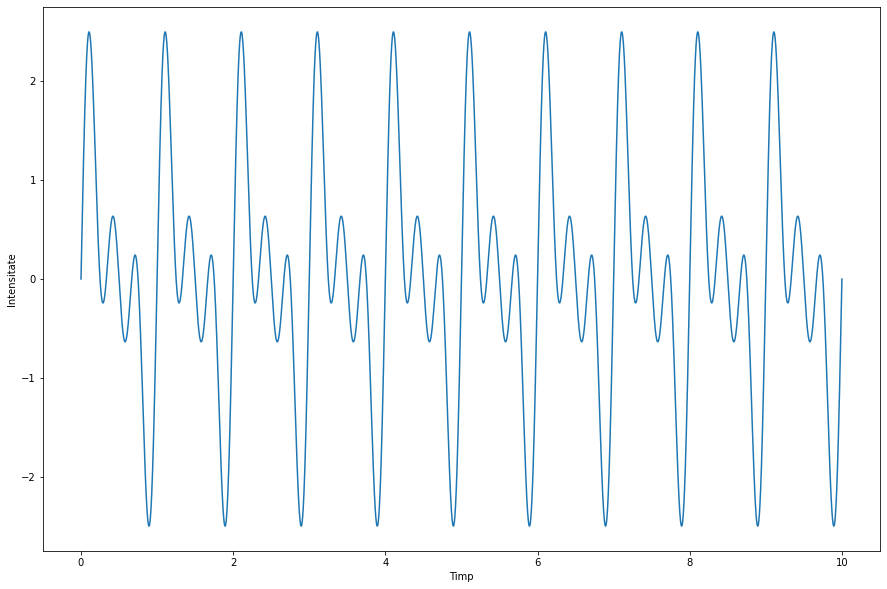

In [8]:
timp = np.linspace(0, 10, 10000)
semnal = creare_semnal(frecventa=1, timp=timp)
plot_semnal(timp, semnal)

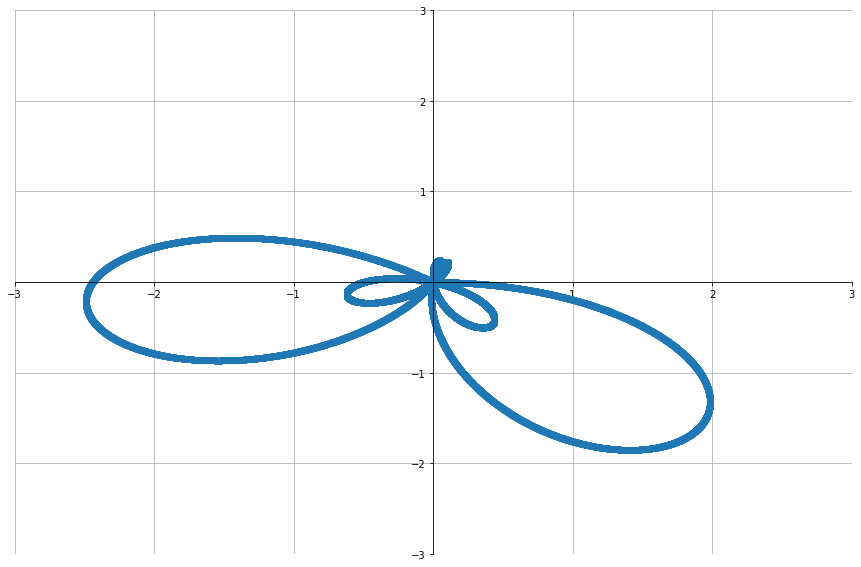

In [9]:
timp = np.linspace(0, 1, 10000)
plot_transformata_fourier(frecventa_ton_pur=1.1,
                          frecventa_semnal=1,
                          timp = timp,
                          plot_centre_of_gravity=False,
                          plot_sum=False)